# Final project for Data Analysis with Python Course - She-Codes
###### Name: shahar vazana
## New York City traffic volume

### The data:
nyc_traffic_data -
Dataset of New York City traffic volume retrieved from ArcGIS.

From https://www.kaggle.com/datasets/bensonduong/nyc-traffic-data?resource=download


## Part 1:
### Exploratory Analysis:
Load, explor the data, remove nulls.

in this part I used the data from "Traffic_Volume_Counts__2014-2019_.csv" table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import scipy.stats as sp
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
style.use('fivethirtyeight')

traffic_volume_counts = pd.read_csv('C:/Users/hahar/Desktop/DA SheCode/Final-Course-Project-DataAnalyst-shecode/Traffic_Volume_Counts__2014-2019_.csv')
traffic_volume_counts.head(5)

,ID,Segment_ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324


##### The columns in the "Traffic_Volume_Counts__2014-2019_.csv" table :
- ID - the ID for each row
- Segment_ID - Road ID  
- Roadway Name
- From - where the road starts
- To - where the road ends
- Direction - the driving direction
- Date - the date of the sample
- 12:00-1:00 AM - 11:00-12:00AM - Cars traffic volume at hourly intervals for 24 hours

In [2]:
traffic_volume_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27289 entries, 0 to 27288
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             27289 non-null  int64  
 1   Segment_ID     27289 non-null  int64  
 2   Roadway Name   27289 non-null  object 
 3   From           27289 non-null  object 
 4   To             27289 non-null  object 
 5   Direction      27289 non-null  object 
 6   Date           27289 non-null  object 
 7   12:00-1:00 AM  27285 non-null  float64
 8   1:00-2:00AM    27285 non-null  float64
 9   2:00-3:00AM    27285 non-null  float64
 10  3:00-4:00AM    27285 non-null  float64
 11  4:00-5:00AM    27285 non-null  float64
 12  5:00-6:00AM    27285 non-null  float64
 13  6:00-7:00AM    27285 non-null  float64
 14  7:00-8:00AM    27285 non-null  float64
 15  8:00-9:00AM    27285 non-null  float64
 16  9:00-10:00AM   27285 non-null  float64
 17  10:00-11:00AM  27286 non-null  float64
 18  11:00-

In [3]:
## check for nulls
traffic_volume_counts.isnull().sum()

ID               0
Segment_ID       0
Roadway Name     0
From             0
To               0
Direction        0
Date             0
12:00-1:00 AM    4
1:00-2:00AM      4
2:00-3:00AM      4
3:00-4:00AM      4
4:00-5:00AM      4
5:00-6:00AM      4
6:00-7:00AM      4
7:00-8:00AM      4
8:00-9:00AM      4
9:00-10:00AM     4
10:00-11:00AM    3
11:00-12:00PM    1
12:00-1:00PM     0
1:00-2:00PM      0
2:00-3:00PM      0
3:00-4:00PM      0
4:00-5:00PM      0
5:00-6:00PM      0
6:00-7:00PM      0
7:00-8:00PM      0
8:00-9:00PM      0
9:00-10:00PM     0
10:00-11:00PM    0
11:00-12:00AM    0
dtype: int64

In [4]:
## remove nulls
traffic_volume_counts=traffic_volume_counts.dropna()

In [5]:
## check for nulls
traffic_volume_counts.isnull().sum().max()

0

##### Adding column for the total traffic for the whole day:

In [6]:
traffic_volume_counts['TotalTraffic'] = traffic_volume_counts['12:00-1:00 AM'] + traffic_volume_counts['1:00-2:00AM'] + \
                                       traffic_volume_counts['2:00-3:00AM'] + traffic_volume_counts['3:00-4:00AM'] + \
                                       traffic_volume_counts['4:00-5:00AM'] + traffic_volume_counts['5:00-6:00AM'] + \
                                       traffic_volume_counts['6:00-7:00AM'] + traffic_volume_counts['7:00-8:00AM'] + \
                                       traffic_volume_counts['8:00-9:00AM'] + traffic_volume_counts['9:00-10:00AM'] + \
                                       traffic_volume_counts['10:00-11:00AM'] + traffic_volume_counts['11:00-12:00PM'] + \
                                       traffic_volume_counts['12:00-1:00PM'] + traffic_volume_counts['1:00-2:00PM'] + \
                                       traffic_volume_counts['2:00-3:00PM'] + traffic_volume_counts['3:00-4:00PM'] + \
                                       traffic_volume_counts['4:00-5:00PM'] + traffic_volume_counts['5:00-6:00PM'] + \
                                       traffic_volume_counts['6:00-7:00PM'] + traffic_volume_counts['7:00-8:00PM'] + \
                                       traffic_volume_counts['8:00-9:00PM'] + traffic_volume_counts['9:00-10:00PM'] + \
                                       traffic_volume_counts['10:00-11:00PM'] + traffic_volume_counts['11:00-12:00AM']

traffic_volume_counts.head()

,ID,Segment_ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,TotalTraffic
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,611,573,546,582,528,432,328,282,240,8097.0
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,376,329,362,418,335,282,247,237,191,6211.0
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,272,264,236,213,190,199,183,147,103,3978.0
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,276,223,240,217,198,186,162,157,103,4003.0
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,...,809,707,675,641,556,546,465,425,324,11477.0


In [7]:
## descriptive statistics summary
traffic_volume_counts.describe()

,ID,Segment_ID,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,TotalTraffic
count,27285.000000,2.728500e+04,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,...,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000
mean,178.339857,6.461689e+05,294.463955,208.562800,156.573355,136.433058,160.225325,248.728972,418.841195,563.831592,...,743.473997,748.797581,745.316364,718.185450,658.451347,578.629393,502.018398,442.678321,370.156643,12175.067290
std,107.478336,2.156081e+06,460.922628,337.987268,264.599920,234.929296,282.590405,487.478933,721.341289,795.208685,...,892.309335,887.153091,878.686915,874.117642,840.899580,780.695313,706.278329,647.325633,560.657327,15547.173728
min,1.000000,2.020000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.000000,3.504100e+04,67.000000,42.000000,30.000000,25.000000,31.000000,47.000000,83.000000,141.000000,...,270.000000,273.000000,273.000000,253.000000,222.000000,182.000000,148.000000,120.000000,91.000000,4155.000000
50%,172.000000,8.169400e+04,132.000000,89.000000,64.000000,54.000000,64.000000,95.000000,174.000000,296.000000,...,449.000000,456.000000,453.000000,428.000000,378.000000,315.000000,261.000000,218.000000,175.000000,6940.000000
75%,272.000000,1.481950e+05,283.000000,203.000000,151.000000,130.000000,149.000000,211.000000,387.000000,601.000000,...,790.000000,803.000000,802.000000,759.000000,669.000000,567.000000,482.000000,420.000000,351.000000,12252.000000
max,372.000000,9.017050e+06,4805.000000,3841.000000,3867.000000,3512.000000,4469.000000,6456.000000,7513.000000,8276.000000,...,7524.000000,8683.000000,9762.000000,9879.000000,10532.000000,6659.000000,5698.000000,5460.000000,5027.000000,111204.000000


## Part 2:
### Data Analysis:
##### The Research question:
The goal is to try to understand which roads are the best to invest in and improve.

- Which roads have the most traffic? Which roads have the highest increase in traffic volume? Is there a match between them?
- In which areas of the city are these roads located?
- Are the roads in New York City going to increase in traffic volume in the next few years? If so, in what year the road will  reach it's max capacity if the change is not made?


### Check if the roads have rised on their total Traffic over the years:
#### Plolttong each segment ID over the years by their Total Traffic:

In [8]:
## converting the date column values to DATE type
traffic_volume_counts['Date'] = pd.to_datetime(traffic_volume_counts['Date'])
## adding a 'year' column from the 'date' column
traffic_volume_counts['year'] = traffic_volume_counts['Date'].dt.year

In [9]:
## sum for the total traffic by the 'Segment_ID', 'Roadway Name' and 'year' group
traffic_volume_counts=traffic_volume_counts.groupby(['Segment_ID','Roadway Name','year'])['TotalTraffic'].sum()
traffic_volume_counts

Segment_ID  Roadway Name       year
202         Main Street        2014     11459.0
1416        BLOOMINGDALE ROAD  2015     85543.0
1883        FOSTER ROAD        2015     85617.0
2147        HUGUENOT AVENUE    2016     95649.0
2367        ARTHUR KILL ROAD   2015    120169.0
                                         ...   
9014764     FDR Drive          2014    562838.0
9017020     5 Avenue           2014    171122.0
9017037     Queens Boulevard   2014    122358.0
9017039     Queens Boulevard   2014    150577.0
9017050     Columbus Avenue    2019    121444.0
Name: TotalTraffic, Length: 2114, dtype: float64

In [10]:
## converting to DataFrame
traffic_volume_counts=pd.DataFrame(traffic_volume_counts)
traffic_volume_counts.head()

,,,TotalTraffic
Segment_ID,Roadway Name,year,
202,Main Street,2014,11459.0
1416,BLOOMINGDALE ROAD,2015,85543.0
1883,FOSTER ROAD,2015,85617.0
2147,HUGUENOT AVENUE,2016,95649.0
2367,ARTHUR KILL ROAD,2015,120169.0


<AxesSubplot:xlabel='year', ylabel='TotalTraffic'>

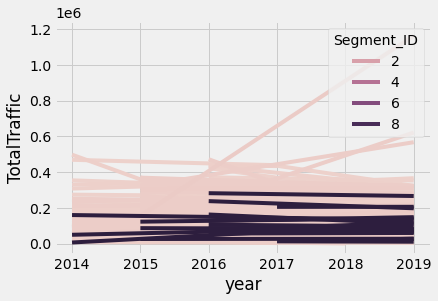

In [11]:
## trying line plotting the table
sns.lineplot(data=traffic_volume_counts ,x='year',y='TotalTraffic',ci=None,hue='Segment_ID')

##### As you can see this is unreadable.

### The solution is to check the top 6 roads with the hieghest rise in the total traffic over the years:

Check that by adding a 'gap' column.

To create the 'gap' column I created 2 new data frames (df,df2), so for each segment ID there is a row with the recent and oldest total traffic sample by the year (I joined df, df2 into new data frame called joined), then calculated the gap between total traffic in the recent and oldest year for each segment ID and add the gap column to the traffic_volume_counts table by joinning them.

In [12]:
## reset the table's indexes 
traffic_volume_counts.reset_index(inplace=True)
traffic_volume_counts.head()

,Segment_ID,Roadway Name,year,TotalTraffic
0,202,Main Street,2014,11459.0
1,1416,BLOOMINGDALE ROAD,2015,85543.0
2,1883,FOSTER ROAD,2015,85617.0
3,2147,HUGUENOT AVENUE,2016,95649.0
4,2367,ARTHUR KILL ROAD,2015,120169.0


In [13]:
## create df with the recent sample by the year for each segment ID
Segments= traffic_volume_counts.groupby('Segment_ID')
df=pd.DataFrame(columns=traffic_volume_counts.columns)
df

,Segment_ID,Roadway Name,year,TotalTraffic


In [14]:
for segment, data in Segments:
    h= data.nlargest(1,'year')
    df=df.append(h, ignore_index=True)

In [15]:
df.dropna(inplace=True)
df

,Segment_ID,Roadway Name,year,TotalTraffic
0,202,Main Street,2014,11459.0
1,1416,BLOOMINGDALE ROAD,2015,85543.0
2,1883,FOSTER ROAD,2015,85617.0
3,2147,HUGUENOT AVENUE,2016,95649.0
4,2367,ARTHUR KILL ROAD,2015,120169.0
...,...,...,...,...
1581,9014764,FDR Drive,2014,562838.0
1582,9017020,5 Avenue,2014,171122.0
1583,9017037,Queens Boulevard,2014,122358.0
1584,9017039,Queens Boulevard,2014,150577.0


In [16]:
## create df2 with the oldest sample by the year for each segment ID
Segments2= traffic_volume_counts.groupby('Segment_ID')
df2=pd.DataFrame(columns=traffic_volume_counts.columns)

In [17]:
for segment, data in Segments2:
    l= data.nsmallest(1,'year')
    df2=df2.append(l, ignore_index=True)

In [18]:
df2.dropna(inplace=True)
df2

,Segment_ID,Roadway Name,year,TotalTraffic
0,202,Main Street,2014,11459.0
1,1416,BLOOMINGDALE ROAD,2015,85543.0
2,1883,FOSTER ROAD,2015,85617.0
3,2147,HUGUENOT AVENUE,2016,95649.0
4,2367,ARTHUR KILL ROAD,2015,120169.0
...,...,...,...,...
1581,9014764,FDR Drive,2014,562838.0
1582,9017020,5 Avenue,2014,171122.0
1583,9017037,Queens Boulevard,2014,122358.0
1584,9017039,Queens Boulevard,2014,150577.0


In [19]:
## drop the unwanted columns for df and df2
df.drop(['Roadway Name','year'],axis=1,inplace=True)
df2.drop(['Roadway Name','year'],axis=1,inplace=True)
## set the indexes for df and df2 to be only Segment_ID
df.set_index('Segment_ID',inplace=True)
df2.set_index('Segment_ID',inplace=True)

In [20]:
## rename the 'TotalTrafic' for df and df2 so when joined it will be easier to tell apart
df.rename(columns={"TotalTraffic": "maxTotalTraffic"},inplace=True)
df2.rename(columns={"TotalTraffic": "minTotalTraffic"},inplace=True)
## joining df, df2 by 'Segment_ID' index
joined=df.join(df2,on='Segment_ID')
joined

,maxTotalTraffic,minTotalTraffic
Segment_ID,,
202,11459.0,11459.0
1416,85543.0,85543.0
1883,85617.0,85617.0
2147,95649.0,95649.0
2367,120169.0,120169.0
...,...,...
9014764,562838.0,562838.0
9017020,171122.0,171122.0
9017037,122358.0,122358.0


In [21]:
## calculate the 'gap' column
joined['gap']=joined['maxTotalTraffic']-joined['minTotalTraffic']
joined

,maxTotalTraffic,minTotalTraffic,gap
Segment_ID,,,
202,11459.0,11459.0,0.0
1416,85543.0,85543.0,0.0
1883,85617.0,85617.0,0.0
2147,95649.0,95649.0,0.0
2367,120169.0,120169.0,0.0
...,...,...,...
9014764,562838.0,562838.0,0.0
9017020,171122.0,171122.0,0.0
9017037,122358.0,122358.0,0.0


In [22]:
## sort the values by the 'gap' desc
joined.sort_values('gap',ascending=False,inplace=True)
joined

,maxTotalTraffic,minTotalTraffic,gap
Segment_ID,,,
251949,1162593.0,154897.0,1007696.0
179513,621733.0,109569.0,512164.0
158938,567625.0,321919.0,245706.0
32333,223698.0,80936.0,142762.0
146567,230962.0,94580.0,136382.0
...,...,...,...
33844,262898.0,422617.0,-159719.0
34512,40017.0,213257.0,-173240.0
33305,130824.0,335554.0,-204730.0


In [23]:
## create new data frame where the 'gap'>0 in order to get only the ones that had a rise in traffic over the years
result=joined.where(joined['gap']>0)
result

,maxTotalTraffic,minTotalTraffic,gap
Segment_ID,,,
251949,1162593.0,154897.0,1007696.0
179513,621733.0,109569.0,512164.0
158938,567625.0,321919.0,245706.0
32333,223698.0,80936.0,142762.0
146567,230962.0,94580.0,136382.0
...,...,...,...
33844,NaN,NaN,NaN
34512,NaN,NaN,NaN
33305,NaN,NaN,NaN


In [24]:
result.dropna(inplace=True)
result

,maxTotalTraffic,minTotalTraffic,gap
Segment_ID,,,
251949,1162593.0,154897.0,1007696.0
179513,621733.0,109569.0,512164.0
158938,567625.0,321919.0,245706.0
32333,223698.0,80936.0,142762.0
146567,230962.0,94580.0,136382.0
...,...,...,...
136482,12072.0,11806.0,266.0
76607,18128.0,17949.0,179.0
88020,74740.0,74595.0,145.0


In [25]:
## drop the unwanted columns for result
result.drop(['maxTotalTraffic','minTotalTraffic'],axis=1,inplace=True)
## set the traffic_volume_counts index to Segment_ID
traffic_volume_counts.set_index('Segment_ID', inplace=True)
## join the result with traffic_volume_counts into new table named tvc
tvc=traffic_volume_counts.join(result,on='Segment_ID')
tvc

,Roadway Name,year,TotalTraffic,gap
Segment_ID,,,,
202,Main Street,2014,11459.0,NaN
1416,BLOOMINGDALE ROAD,2015,85543.0,NaN
1883,FOSTER ROAD,2015,85617.0,NaN
2147,HUGUENOT AVENUE,2016,95649.0,NaN
2367,ARTHUR KILL ROAD,2015,120169.0,NaN
...,...,...,...,...
9014764,FDR Drive,2014,562838.0,NaN
9017020,5 Avenue,2014,171122.0,NaN
9017037,Queens Boulevard,2014,122358.0,NaN


In [26]:
## drop null values
tvc.dropna(inplace=True)
tvc

,Roadway Name,year,TotalTraffic,gap
Segment_ID,,,,
7453,Richmond Road,2014,128225.0,2623.0
7453,Richmond Road,2017,130848.0,2623.0
8070,ROCKLAND AVENUE,2016,141731.0,14793.0
8070,Rockland Avenue,2019,156524.0,14793.0
12832,VICTORY BOULEVARD,2015,125536.0,10453.0
...,...,...,...,...
9008830,Pelham Parkway,2019,148964.0,20966.0
9009052,Catherine Street,2018,18487.0,10229.0
9009052,Catherine Street,2019,28716.0,10229.0


In [27]:
## reset the tvc index and sort the values by the 'gap' desc
tvc.reset_index(inplace=True)
tvc.sort_values('gap',ascending=False,inplace=True)
tvc

,Segment_ID,Roadway Name,year,TotalTraffic,gap
419,251949,Exterior Street,2019,1162593.0,1007696.0
418,251949,EXTERIOR STREET,2015,154897.0,1007696.0
406,179513,RANDALL AVENUE,2015,109569.0,512164.0
407,179513,Randall Avenue,2019,621733.0,512164.0
393,158938,WEST STREET,2015,321919.0,245706.0
...,...,...,...,...,...
259,88020,Bronxwood Avenue,2019,74740.0,145.0
186,63023,120 Avenue,2014,85265.0,49.0
187,63023,120 Avenue,2017,85314.0,49.0
130,32327,Grand Street,2019,78414.0,33.0


<AxesSubplot:xlabel='year', ylabel='TotalTraffic'>

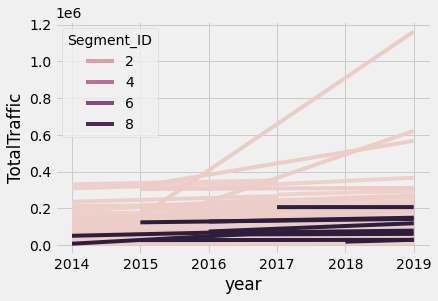

In [28]:
## plotting the tvc data
sns.lineplot(data=tvc,x='year',y='TotalTraffic',ci=None,hue='Segment_ID')

In [29]:
## helped table for only the top 6 roads with the highest gap over the years
tvctop10=tvc.head(12)
tvctop10

,Segment_ID,Roadway Name,year,TotalTraffic,gap
419,251949,Exterior Street,2019,1162593.0,1007696.0
418,251949,EXTERIOR STREET,2015,154897.0,1007696.0
406,179513,RANDALL AVENUE,2015,109569.0,512164.0
407,179513,Randall Avenue,2019,621733.0,512164.0
393,158938,WEST STREET,2015,321919.0,245706.0
394,158938,West Street,2019,567625.0,245706.0
132,32333,Grand Street,2019,223698.0,142762.0
131,32333,Grand Street,2017,80936.0,142762.0
345,146567,Boston Road,2017,230962.0,136382.0
344,146567,Boston Road,2014,94580.0,136382.0


<AxesSubplot:xlabel='year', ylabel='TotalTraffic'>

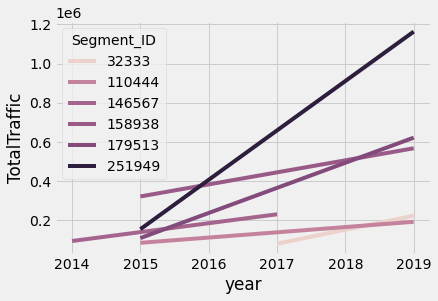

In [30]:
## plotting the tvctop10 table for the top 6 roads with the highest gap over the years
sns.lineplot(data=tvctop10,x='year',y='TotalTraffic',ci=None,hue='Segment_ID')

### display the gragh also in a bar chart :

In [31]:
## reset the result table index
result.reset_index(inplace=True)
result

,Segment_ID,gap
0,251949,1007696.0
1,179513,512164.0
2,158938,245706.0
3,32333,142762.0
4,146567,136382.0
...,...,...
212,136482,266.0
213,76607,179.0
214,88020,145.0
215,63023,49.0


<AxesSubplot:xlabel='Segment_ID'>

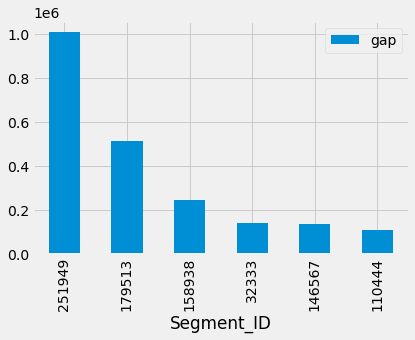

In [32]:
result=result.head(6)
result.plot(kind='bar',x='Segment_ID',y='gap')

### which roads have the highest overall total traffic and are they matched with the roads from the graph above:

In [33]:
## sum of Total Traffic for the roads from tvc table
mostTraffic= pd.DataFrame(tvc.groupby('Segment_ID')['TotalTraffic'].sum())
mostTraffic.reset_index(inplace=True)
mostTraffic.sort_values('TotalTraffic',ascending=False,inplace=True)
mostTraffic

,Segment_ID,TotalTraffic
202,251949,1317490.0
190,158938,889544.0
196,179513,731302.0
95,67868,682929.0
38,22924,680994.0
...,...,...
69,35041,26511.0
104,70586,26145.0
159,136482,23878.0
150,117242,19294.0


<AxesSubplot:xlabel='Segment_ID'>

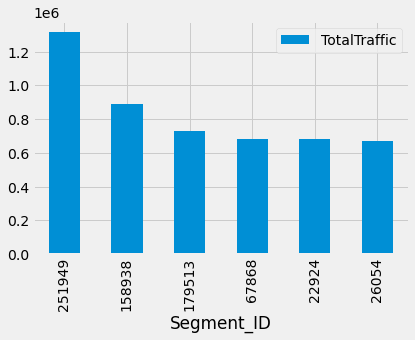

In [34]:
## plotting a bar chart for the top 6 roads
mostTraffic = mostTraffic.head(6)
mostTraffic.plot(kind='bar',x='Segment_ID',y='TotalTraffic')

### Conclusion:
As you can see, the first top 3 roads that have the highest total traffic are the same top 3 roads that had the highest gap (rise of total traffic over the years).

So these 3 roads can be good candidates for the most problematic roads that needs to be improved before the traffic will be unbearable for the drivers.


###### We can chack when these 3 roads will reach their max capacity (lets say double from their current gap) by using linear regression:

In [35]:
## data load
traffic_volume_counts_for_regg = pd.read_csv('C:/Users/hahar/Desktop/DA SheCode/Final-Course-Project-DataAnalyst-shecode/Traffic_Volume_Counts__2014-2019_.csv')
traffic_volume_counts_for_regg.head()

,ID,Segment_ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324


In [36]:
## adding the 'TotalTraffic' column same as before 
traffic_volume_counts_for_regg=traffic_volume_counts_for_regg.dropna()
traffic_volume_counts_for_regg['TotalTraffic'] = traffic_volume_counts_for_regg['12:00-1:00 AM'] + traffic_volume_counts_for_regg['1:00-2:00AM'] + \
                                       traffic_volume_counts_for_regg['2:00-3:00AM'] + traffic_volume_counts_for_regg['3:00-4:00AM'] + \
                                       traffic_volume_counts_for_regg['4:00-5:00AM'] + traffic_volume_counts_for_regg['5:00-6:00AM'] + \
                                       traffic_volume_counts_for_regg['6:00-7:00AM'] + traffic_volume_counts_for_regg['7:00-8:00AM'] + \
                                       traffic_volume_counts_for_regg['8:00-9:00AM'] + traffic_volume_counts_for_regg['9:00-10:00AM'] + \
                                       traffic_volume_counts_for_regg['10:00-11:00AM'] + traffic_volume_counts_for_regg['11:00-12:00PM'] + \
                                       traffic_volume_counts_for_regg['12:00-1:00PM'] + traffic_volume_counts_for_regg['1:00-2:00PM'] + \
                                       traffic_volume_counts_for_regg['2:00-3:00PM'] + traffic_volume_counts_for_regg['3:00-4:00PM'] + \
                                       traffic_volume_counts_for_regg['4:00-5:00PM'] + traffic_volume_counts_for_regg['5:00-6:00PM'] + \
                                       traffic_volume_counts_for_regg['6:00-7:00PM'] + traffic_volume_counts_for_regg['7:00-8:00PM'] + \
                                       traffic_volume_counts_for_regg['8:00-9:00PM'] + traffic_volume_counts_for_regg['9:00-10:00PM'] + \
                                       traffic_volume_counts_for_regg['10:00-11:00PM'] + traffic_volume_counts_for_regg['11:00-12:00AM']

###### Forecasting when these top 3 roads will reach their max capacity (lets say double from their current gap) by using linear regression:

###### For the first road:
Segment ID=251949

max capacity=2015392.0

In [37]:
## get only the rows for the current road
tvcfr= traffic_volume_counts_for_regg.where(traffic_volume_counts_for_regg['Segment_ID']==251949)
#tvcfr.reset_index(inplace=True)
tvcfr.dropna(inplace=True)

In [38]:
## drop the unwanted columns
tvcfr.drop(['ID','Roadway Name','From','To','Direction','12:00-1:00 AM','1:00-2:00AM','2:00-3:00AM','3:00-4:00AM','4:00-5:00AM','5:00-6:00AM','6:00-7:00AM','7:00-8:00AM','8:00-9:00AM','9:00-10:00AM','10:00-11:00AM','11:00-12:00PM','12:00-1:00PM','1:00-2:00PM','2:00-3:00PM','3:00-4:00PM','4:00-5:00PM','5:00-6:00PM','6:00-7:00PM','7:00-8:00PM','8:00-9:00PM','9:00-10:00PM','10:00-11:00PM','11:00-12:00AM'],axis=1,inplace=True)
tvcfr

,Segment_ID,Date,TotalTraffic
8653,251949.0,10/10/2015,10351.0
8654,251949.0,10/10/2015,8546.0
8876,251949.0,10/11/2015,8571.0
8877,251949.0,10/11/2015,7398.0
9101,251949.0,10/12/2015,10071.0
9102,251949.0,10/12/2015,7135.0
9185,251949.0,10/13/2015,9677.0
9186,251949.0,10/13/2015,7123.0
9270,251949.0,10/14/2015,9481.0
9271,251949.0,10/14/2015,7259.0


In [39]:
## check the columns data types
tvcfr.dtypes

Segment_ID      float64
Date             object
TotalTraffic    float64
dtype: object

In [40]:
## change the data type for the 'TotalTraffic' and 'Segment_ID' to int, 'Date' to datetime
tvcfr['Segment_ID']=tvcfr['Segment_ID'].astype('int64')
tvcfr['TotalTraffic']=tvcfr['TotalTraffic'].astype('int64')
tvcfr['Date']=pd.to_datetime(tvcfr['Date'])
tvcfr.dtypes

Segment_ID               int64
Date            datetime64[ns]
TotalTraffic             int64
dtype: object

In [41]:
## create new column named ts_Date typed as timestamp-int for the 'Date' column
tvcfr['ts_Date'] = tvcfr[['Date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
tvcfr.head()

,Segment_ID,Date,TotalTraffic,ts_Date
8653,251949,2015-10-10,10351,1444435200
8654,251949,2015-10-10,8546,1444435200
8876,251949,2015-10-11,8571,1444521600
8877,251949,2015-10-11,7398,1444521600
9101,251949,2015-10-12,10071,1444608000


In [42]:
## check the columns data types
tvcfr.dtypes

Segment_ID               int64
Date            datetime64[ns]
TotalTraffic             int64
ts_Date                  int32
dtype: object

In [43]:
## drop the unwanted columns
tvcfr.drop(['Segment_ID','Date'],axis=1,inplace=True)

In [44]:
## set the index to 'ts_Date'
tvcfr.set_index('ts_Date', inplace=True)

<AxesSubplot:xlabel='ts_Date'>

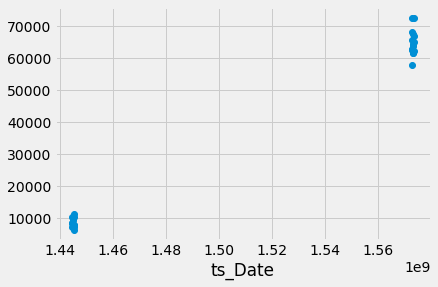

In [45]:
## plotting the road's 'TotalTraffic' data by the 'ts_Date'
tvcfr['TotalTraffic'].plot(marker='o', ls='')

In [46]:
y=np.array(tvcfr['TotalTraffic'].values)
x=np.array(tvcfr['TotalTraffic'].index.values)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
yf = (slope*x)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.9950630750796007 
 p =  1.0545344965500674e-35 
 s =  7.4682532372854525e-06


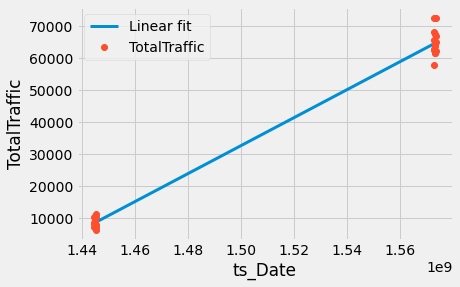

In [47]:
## plotting the road's 'TotalTraffic' data by the 'Date' and adding the linear regression line
f, ax = plt.subplots(1, 1)
ax.plot(x, yf,label='Linear fit', lw=3)
tvcfr['TotalTraffic'].plot(ax=ax,marker='o', ls='')
plt.ylabel('TotalTraffic')
ax.legend()

calculate when the max capacity for this road 

by insert the variables into the linear regression line equation:

yf = (slope*xf)+intercept

##### (yf_pred-intercept)/slope =xf_pred


In [48]:
yf_pred=2015392.0

In [49]:
z=(yf_pred-intercept)
z

2637604.7686520275

In [50]:
x_pred=z/slope
x_pred

6040977121.639166

In [51]:
## change the data type for x_pred from timestamp to datetime
date_pred = datetime.fromtimestamp(x_pred)

print(date_pred)
type(date_pred)

2161-06-06 20:12:01.639166


datetime.datetime

###### For the second road:
Segment ID=179513

max capacity=1024328.0

In [52]:
## get only the rows for the current road
tvcfr2= traffic_volume_counts_for_regg.where(traffic_volume_counts_for_regg['Segment_ID']==179513)
#tvcfr.reset_index(inplace=True)
tvcfr2.dropna(inplace=True)

In [53]:
## drop the unwanted columns
tvcfr2.drop(['ID','Roadway Name','From','To','Direction','12:00-1:00 AM','1:00-2:00AM','2:00-3:00AM','3:00-4:00AM','4:00-5:00AM','5:00-6:00AM','6:00-7:00AM','7:00-8:00AM','8:00-9:00AM','9:00-10:00AM','10:00-11:00AM','11:00-12:00PM','12:00-1:00PM','1:00-2:00PM','2:00-3:00PM','3:00-4:00PM','4:00-5:00PM','5:00-6:00PM','6:00-7:00PM','7:00-8:00PM','8:00-9:00PM','9:00-10:00PM','10:00-11:00PM','11:00-12:00AM'],axis=1,inplace=True)

In [54]:
## check the columns data types
tvcfr2.dtypes

Segment_ID      float64
Date             object
TotalTraffic    float64
dtype: object

In [55]:
## change the data type for the 'TotalTraffic' and 'Segment_ID' to int, 'Date' to datetime
tvcfr2['Segment_ID']=tvcfr2['Segment_ID'].astype('int64')
tvcfr2['TotalTraffic']=tvcfr2['TotalTraffic'].astype('int64')
tvcfr2['Date']=pd.to_datetime(tvcfr2['Date'])
tvcfr2.dtypes

Segment_ID               int64
Date            datetime64[ns]
TotalTraffic             int64
dtype: object

In [56]:
## create new column named ts_Date typed as timestamp-int for the 'Date' column
tvcfr2['ts_Date'] = tvcfr2[['Date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
tvcfr2.head()

,Segment_ID,Date,TotalTraffic,ts_Date
10245,179513,2015-10-31,10201,1446249600
10246,179513,2015-10-31,2780,1446249600
10394,179513,2015-11-01,8413,1446336000
10395,179513,2015-11-01,2549,1446336000
10542,179513,2015-11-02,9622,1446422400


In [57]:
## check the columns data types
tvcfr2.dtypes

Segment_ID               int64
Date            datetime64[ns]
TotalTraffic             int64
ts_Date                  int32
dtype: object

In [58]:
## drop the unwanted columns
tvcfr2.drop(['Segment_ID','Date'],axis=1,inplace=True)

In [59]:
## set the index to 'ts_Date'
tvcfr2.set_index('ts_Date', inplace=True)

<AxesSubplot:xlabel='ts_Date'>

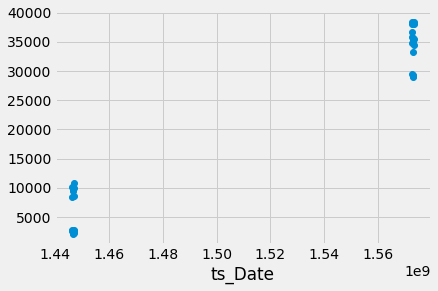

In [60]:
## plotting the road's 'TotalTraffic' data by the 'ts_Date'
tvcfr2['TotalTraffic'].plot(marker='o', ls='')

In [61]:
y=np.array(tvcfr2['TotalTraffic'].values)
x=np.array(tvcfr2['TotalTraffic'].index.values)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
yf = (slope*x)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.9723772184896143 
 p =  4.579899611341263e-23 
 s =  9.266863705347833e-06


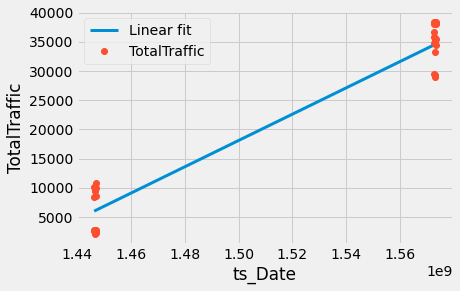

In [62]:
## plotting the road's 'TotalTraffic' data by the 'Date' and adding the linear regression line
f, ax = plt.subplots(1, 1)
ax.plot(x, yf,label='Linear fit', lw=3)
tvcfr2['TotalTraffic'].plot(ax=ax,marker='o', ls='')
plt.ylabel('TotalTraffic')
ax.legend()

calculate when the max capacity for this road 

by insert the variables into the linear regression line equation:

yf = (slope*xf)+intercept

##### (yf_pred-intercept)/slope =xf_pred


In [63]:
yf_pred=1024328.0

In [64]:
z=(yf_pred-intercept)
z

1343871.523176755

In [65]:
x_pred=z/slope
x_pred

5970070157.660495

In [66]:
## change the data type for x_pred from timestamp to datetime
date_pred2 = datetime.fromtimestamp(x_pred)

print(date_pred2)
type(date_pred2)

2159-03-09 02:49:17.660495


datetime.datetime

###### For the third road:
Segment ID=158938

max capacity=491412.0

In [67]:
## get only the rows for the current road
tvcfr3= traffic_volume_counts_for_regg.where(traffic_volume_counts_for_regg['Segment_ID']==158938)
#tvcfr3.reset_index(inplace=True)
tvcfr3.dropna(inplace=True)

In [68]:
## drop the unwanted columns
tvcfr3.drop(['ID','Roadway Name','From','To','Direction','12:00-1:00 AM','1:00-2:00AM','2:00-3:00AM','3:00-4:00AM','4:00-5:00AM','5:00-6:00AM','6:00-7:00AM','7:00-8:00AM','8:00-9:00AM','9:00-10:00AM','10:00-11:00AM','11:00-12:00PM','12:00-1:00PM','1:00-2:00PM','2:00-3:00PM','3:00-4:00PM','4:00-5:00PM','5:00-6:00PM','6:00-7:00PM','7:00-8:00PM','8:00-9:00PM','9:00-10:00PM','10:00-11:00PM','11:00-12:00AM'],axis=1,inplace=True)

In [69]:
## check the columns data types
tvcfr3.dtypes

Segment_ID      float64
Date             object
TotalTraffic    float64
dtype: object

In [70]:
## change the data type for the 'TotalTraffic' and 'Segment_ID' to int, 'Date' to datetime
tvcfr3['Segment_ID']=tvcfr3['Segment_ID'].astype('int64')
tvcfr3['TotalTraffic']=tvcfr3['TotalTraffic'].astype('int64')
#tvcfr3['Date'].astype('int32')
tvcfr3['Date']=pd.to_datetime(tvcfr3['Date'])
tvcfr3.dtypes

Segment_ID               int64
Date            datetime64[ns]
TotalTraffic             int64
dtype: object

In [71]:
## create new column named ts_Date typed as timestamp-int for the 'Date' column
tvcfr3['ts_Date'] = tvcfr3[['Date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
tvcfr3.head()

,Segment_ID,Date,TotalTraffic,ts_Date
7716,158938,2015-10-03,33111,1443830400
7856,158938,2015-10-04,27213,1443916800
7996,158938,2015-10-05,35979,1444003200
8137,158938,2015-10-06,38571,1444089600
8277,158938,2015-10-07,42697,1444176000


In [72]:
## check the columns data types
tvcfr3.dtypes

Segment_ID               int64
Date            datetime64[ns]
TotalTraffic             int64
ts_Date                  int32
dtype: object

In [73]:
## drop the unwanted columns
tvcfr3.drop(['Segment_ID','Date'],axis=1,inplace=True)

In [74]:
## set the index to 'ts_Date'
tvcfr3.set_index('ts_Date', inplace=True)

<AxesSubplot:xlabel='ts_Date'>

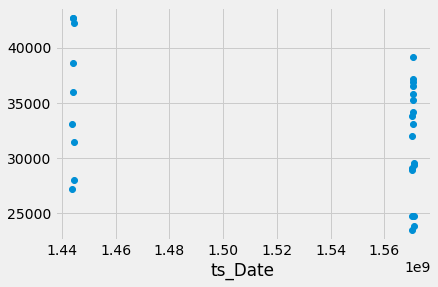

In [75]:
## plotting the road's 'TotalTraffic' data by the 'ts_Date'
tvcfr3['TotalTraffic'].plot(marker='o', ls='')

In [76]:
y=np.array(tvcfr3['TotalTraffic'].values)
x=np.array(tvcfr3['TotalTraffic'].index.values)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
yf = (slope*x)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  -0.35754400176851486 
 p =  0.06709976849571901 
 s =  1.748564531612645e-05


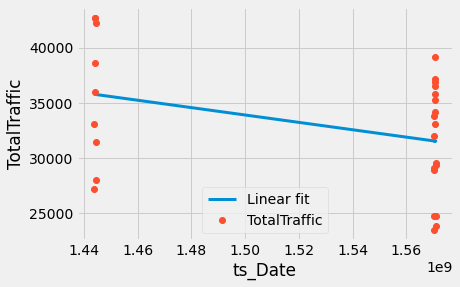

In [77]:
## plotting the road's 'TotalTraffic' data by the 'Date' and adding the linear regression line
f, ax = plt.subplots(1, 1)
ax.plot(x, yf,label='Linear fit', lw=3)
tvcfr3['TotalTraffic'].plot(ax=ax,marker='o', ls='')
plt.ylabel('TotalTraffic')
ax.legend()

calculate when the max capacity for this road 

by insert the variables into the linear regression line equation:

yf = (slope*xf)+intercept

##### (yf_pred-intercept)/slope =xf_pred


In [78]:
yf_pred=491412.0

In [79]:
z=(yf_pred-intercept)
z

407305.72130884114

In [80]:
x_pred=z/slope
x_pred

-12168526619.552471

In [81]:
## change the data type for x_pred from timestamp to datetime
date_pred3 = datetime.fromtimestamp(x_pred)

print("dt_object =", date_pred3)
type(date_pred3)

OSError: [Errno 22] Invalid argument

###### The error is because the x_pred value is negative. 

So it is assumed that the value has already occurred before

### Conclusion:
For the first two roads the predicted year when each road will reach it's max capacity (double the current gap):

- For Segment ID=251949 it is the year 2161
- For Segment ID=179513 it is the year 2159

Both years are in the distant future. But additional parameters must still be taken into account and also the fact that the observations were few for each road and with a large difference in years, therefore the level of accuracy is low. And from past experience, high traffic roads will reach their maximum capacity level quickly. Therefore, in my opinion, it is necessary to invest in and improve these two roads, and perhaps more.

### Pie chart for the top 6 highest traffic volume roads by their area code in NYC:

#### Load the data from "nyc_traffic_EDA_orig.csv" table 

check the data to see if every road was checked only on one season.
if so, then the Traffic_Volume was calculated as the avg traffic grouped by Is_Weekend and hours intervals (3_Hr_Intvl) over the years for each road, and not also by the seasons.

In this part I'm using "nyc_traffic_EDA_orig.csv" table.

In [82]:
traffic_EDA = pd.read_csv('C:/Users/hahar/Desktop/DA SheCode/Final-Course-Project-DataAnalyst-shecode/nyc_traffic_EDA_orig.csv')
traffic_EDA

,Segment_ID,Is_Weekend,3_Hr_Intvl,Season,Traffic_Volume,StreetWidth_z,StreetWidth,UnitsRes_Prop,NumFloors,SubwayProximity,LandUse_t1,LandUse_t2,LandUse_t3,LandUse_t4,LandUse_t5,BoroCode
0,132595,False,3,Autumn,165.80,1.072245,56.0,0.826421,2.371179,0.051088,0.764192,0.122271,0.026201,0.052402,0.034934,Bronx
1,132595,False,6,Autumn,109.40,1.072245,56.0,0.826421,2.371179,0.051088,0.764192,0.122271,0.026201,0.052402,0.034934,Bronx
2,132595,False,9,Autumn,328.87,1.072245,56.0,0.826421,2.371179,0.051088,0.764192,0.122271,0.026201,0.052402,0.034934,Bronx
3,132595,False,12,Autumn,374.40,1.072245,56.0,0.826421,2.371179,0.051088,0.764192,0.122271,0.026201,0.052402,0.034934,Bronx
4,132595,False,15,Autumn,397.87,1.072245,56.0,0.826421,2.371179,0.051088,0.764192,0.122271,0.026201,0.052402,0.034934,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,265550,True,12,Autumn,180.38,-0.927162,30.0,0.964525,2.110608,0.033429,0.914449,0.024715,0.003802,0.007605,0.049430,Staten Island
28900,265550,True,15,Autumn,212.75,-0.927162,30.0,0.964525,2.110608,0.033429,0.914449,0.024715,0.003802,0.007605,0.049430,Staten Island
28901,265550,True,18,Autumn,197.67,-0.927162,30.0,0.964525,2.110608,0.033429,0.914449,0.024715,0.003802,0.007605,0.049430,Staten Island
28902,265550,True,21,Autumn,164.33,-0.927162,30.0,0.964525,2.110608,0.033429,0.914449,0.024715,0.003802,0.007605,0.049430,Staten Island


In [83]:
## count number of unique seasons for each 'segment ID' 
grouped_traffic_EDA= traffic_EDA.groupby(['Segment_ID','Season']).agg({"Season": pd.Series.nunique})
grouped_traffic_EDA.rename(columns={"Season": "SeasonCount"},inplace=True)
grouped_traffic_EDA

,,SeasonCount
Segment_ID,Season,
202,Autumn,1
1416,Autumn,1
1883,Autumn,1
2147,Spring,1
2367,Autumn,1
...,...,...
9014764,Autumn,1
9017020,Autumn,1
9017037,Autumn,1


In [84]:
## get only the ones that have more then 1 season and drop the null values
grouped_traffic_EDA.sort_values('SeasonCount',ascending=False,inplace=True)
grouped_traffic_EDA_more_then1=grouped_traffic_EDA.where(grouped_traffic_EDA['SeasonCount']>1)
grouped_traffic_EDA_more_then1

,,SeasonCount
Segment_ID,Season,
202,Autumn,NaN
145421,Autumn,NaN
146329,Autumn,NaN
146328,Autumn,NaN
146142,Autumn,NaN
...,...,...
64066,Autumn,NaN
64059,Autumn,NaN
63023,Autumn,NaN


In [85]:
grouped_traffic_EDA_more_then1.dropna(inplace=True)
grouped_traffic_EDA_more_then1

,,SeasonCount
Segment_ID,Season,


As you can see, the table is empty so all the roads have only one seson.


In [86]:
## sum of Traffic_Volume group by the region and segment ID 
grouped_traffic_EDA_for_region= pd.DataFrame(traffic_EDA.groupby(['Segment_ID','BoroCode'])['Traffic_Volume'].sum())
grouped_traffic_EDA_for_region.dropna(inplace=True)
#grouped_traffic_EDA_for_regon.sort_values('Traffic_Volume',ascending=False,inplace=True)
grouped_traffic_EDA_for_region.reset_index(inplace=True)
grouped_traffic_EDA_for_region

,Segment_ID,BoroCode,Traffic_Volume
0,202,Staten Island,3819.66
1,1416,Staten Island,6291.78
2,1883,Staten Island,6311.76
3,2147,Staten Island,6982.38
4,2367,Staten Island,8847.92
...,...,...,...
1458,9014764,Manhattan,41275.39
1459,9017020,Manhattan,74551.86
1460,9017037,Queens,8906.17
1461,9017039,Queens,54367.00


In [87]:
## set the grouped_traffic_EDA_for_region and mostTraffic index to be Segment_ID
grouped_traffic_EDA_for_region.set_index('Segment_ID',inplace=True)
mostTraffic.set_index('Segment_ID',inplace=True)
## join grouped_traffic_EDA_for_region and mostTraffic tables on Segment_ID to get the top 6 most traffic roads
joined_for_region=grouped_traffic_EDA_for_region.join(mostTraffic,on='Segment_ID')
joined_for_region.dropna(inplace=True)
joined_for_region.sort_values('TotalTraffic',ascending=False,inplace=True)
joined_for_region

,BoroCode,Traffic_Volume,TotalTraffic
Segment_ID,,,
251949,Bronx,195749.24,1317490.0
158938,Manhattan,32431.02,889544.0
179513,Bronx,27217.39,731302.0
67868,Queens,25099.91,682929.0
22924,Brooklyn,25082.00,680994.0
26054,Brooklyn,16362.14,671667.0


In [88]:
## reset the joined_for_region index to be BoroCode
joined_for_region.reset_index(inplace=True)
joined_for_region.set_index('BoroCode',inplace=True)
joined_for_region

,Segment_ID,Traffic_Volume,TotalTraffic
BoroCode,,,
Bronx,251949,195749.24,1317490.0
Manhattan,158938,32431.02,889544.0
Bronx,179513,27217.39,731302.0
Queens,67868,25099.91,682929.0
Brooklyn,22924,25082.00,680994.0
Brooklyn,26054,16362.14,671667.0


In [89]:
## count for each region the number of segment ID 
grouped_joined_for_region= joined_for_region.groupby('BoroCode').agg({"Segment_ID": pd.Series.nunique})
grouped_joined_for_region

,Segment_ID
BoroCode,
Bronx,2
Brooklyn,2
Manhattan,1
Queens,1


<AxesSubplot:ylabel='Segment_ID'>

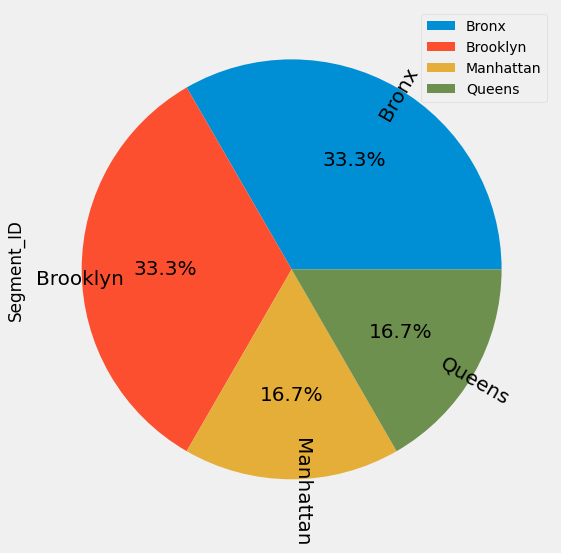

In [90]:
## plotting the pie chart
grouped_joined_for_region.plot.pie(y='Segment_ID',fontsize=20,figsize=(9, 9),labeldistance=0.8,rotatelabels=True,autopct='%1.1f%%')

### Conclusion:

Most of the top 6 roads with the highest traffic volume comes from brooklyn or the bronx.

The top 3 highest traffic volume roads are from the bronx area in NYC so perhaps this area should be explored more deeply, check if it is necessary to invest in more roads in this area and try to understand what else causes the rise in the traffic volume on the roads in this area and whether there is a way to solve the problem through another factor.